<a href="https://colab.research.google.com/github/jerry71867/LLM/blob/main/keras_CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
#導入了TensorFlow中的Keras模組，同時導入了建立神經網絡所需的Sequential模型和不同的層類別，包括Dense（全連接層）、Conv2D（二維卷積層）、MaxPooling2D（二維最大池化層）和Flatten（扁平層）。
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
#添加一個卷積層 Conv2D，其中有16個濾波器（filters），每個濾波器的大小為5x5。input_shape 指定了輸入數據的形狀，這裡是(28, 28, 1)，表示28x28像素的單通道圖像。
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#添加了一個扁平層 Flatten，它將之前所有層的輸出“扁平化”成一維數組，以便輸入到後續的全連接層。
model.add(Dense(10, activation='softmax'))
#添加了一個全連接層 Dense，其中有10個神經元，激活函數為Softmax。這是一個多類分類的輸出層，Softmax函數將輸出轉換為0到1之間的概率值，用於分類問題。
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 10)                23050     
                                                                 
Total params: 23466 (91.66 KB)
Trainable params: 23466 (91.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
mnist=keras.datasets.mnist
#將Keras的datasets模組中的mnist數據集賦值給變數mnist。
(train_data, train_label), (test_data, test_label) = mnist.load_data()
#使用load_data()方法從mnist數據集中加載訓練數據、訓練標籤、測試數據和測試標籤。
test_label_original=test_label #for crosstab
train_label = keras.utils.to_categorical(train_label)
#使用keras.utils.to_categorical函數將訓練標籤 train_label 轉換成獨熱編碼（one-hot encoding）的形式。
test_label = keras.utils.to_categorical(test_label)
#對測試標籤 test_label 執行類似的獨熱編碼轉換，以便後續的模型評估和測試。

In [5]:
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)
#使用已經編譯的Keras模型 model 對訓練數據 train_data 進行訓練。


Epoch 1/10
118/118 [==============================] - 19s 155ms/step - loss: 6.0739 - accuracy: 0.7780
Epoch 2/10
118/118 [==============================] - 19s 162ms/step - loss: 0.3655 - accuracy: 0.9455
Epoch 3/10
118/118 [==============================] - 19s 157ms/step - loss: 0.1456 - accuracy: 0.9688
Epoch 4/10
118/118 [==============================] - 18s 156ms/step - loss: 0.0809 - accuracy: 0.9790
Epoch 5/10
118/118 [==============================] - 19s 157ms/step - loss: 0.0540 - accuracy: 0.9839
Epoch 6/10
118/118 [==============================] - 18s 153ms/step - loss: 0.0416 - accuracy: 0.9880
Epoch 7/10
118/118 [==============================] - 20s 168ms/step - loss: 0.0310 - accuracy: 0.9904
Epoch 8/10
118/118 [==============================] - 21s 174ms/step - loss: 0.0248 - accuracy: 0.9921
Epoch 9/10
118/118 [==============================] - 20s 171ms/step - loss: 0.0205 - accuracy: 0.9937
Epoch 10/10
118/118 [==============================] - 18s 151ms/step - l

In [6]:
score=model.evaluate(test_data, test_label)
print(score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.1031 - accuracy: 0.9802
0.9801999926567078


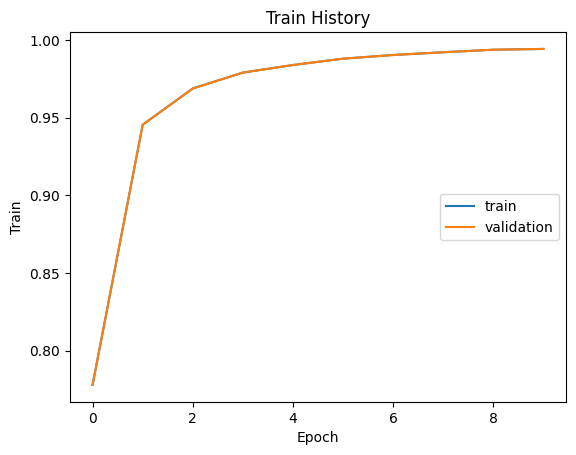

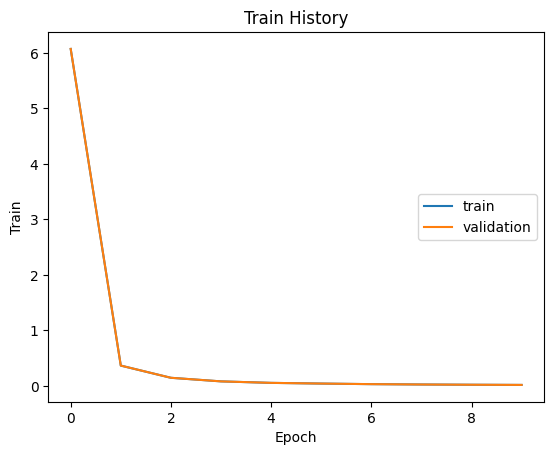

313/313 [==============================] - 3s 9ms/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,2,0,0,0,2,1,3,0
1,0,1128,1,1,2,0,1,1,1,0
2,0,4,1014,1,4,0,1,5,3,0
3,0,0,3,1002,0,1,0,0,2,2
4,0,1,1,0,963,0,2,1,1,13
5,2,0,1,13,1,860,3,0,3,9
6,5,2,0,1,5,2,940,0,3,0
7,0,6,9,3,5,0,0,988,6,11
8,5,1,6,3,0,2,2,1,949,5


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
#呼叫名為 show_train_history 的自定義函數，用於顯示訓練歷史的準確率變化。
show_train_history(train_history, 'loss', 'loss')
#呼叫 show_train_history 函數，用於顯示訓練歷史的損失函數（loss）變化。


# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict(test_data)
#使用訓練好的模型 model 對測試數據 test_data 進行預測，獲得預測結果 prediction。
prediction_label=np.argmax(prediction,axis=1)
#用來獲得每個測試樣本的預測類別標籤，通過找到預測概率最大的類別。
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])
#創建混淆矩陣，它比較了模型的預測結果 prediction_label 與原始測試標籤 test_label_original 之間的差異。

